
# Word Embeddings

You know at this point that machine learning on text requires that you first represent the text numerically. So far, you've done this with bag of words representations. But you can usually do better with word embeddings.

**Word embeddings** (also called word vectors) represent each word numerically in such a way that the vector corresponds to how that word is used or what it means. Vector encodings are learned by considering the context in which the words appear. Words that appear in similar contexts will have similar vectors. For example, vectors for "leopard", "lion", and "tiger" will be close together, while they'll be far away from "planet" and "castle".

Even cooler, relations between words can be examined with mathematical operations. Subtracting the vectors for "man" and "woman" will return another vector. If you add that to the vector for "king" the result is close to the vector for "queen."

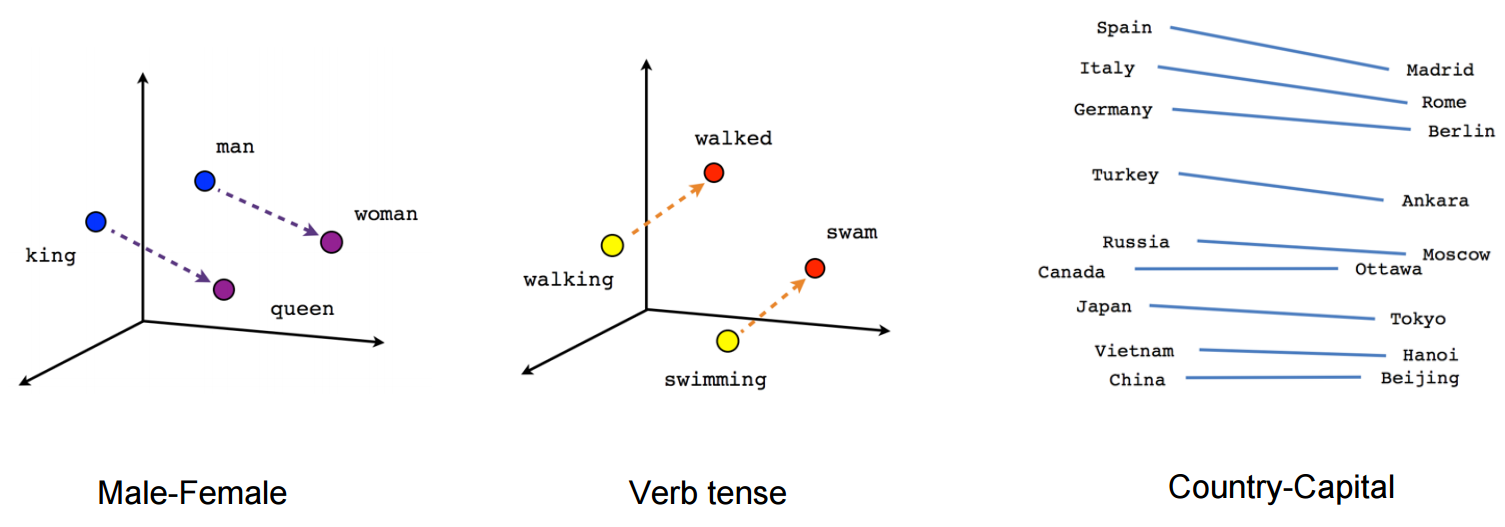
>Word vector examples

These vectors can be used as features for machine learning models. Word vectors will typically improve the performance of your models above bag of words encoding. spaCy provides embeddings learned from a model called Word2Vec. You can access them by loading a large language model like `en_core_web_lg.` Then they will be available on tokens from the `.vector` attribute.




In [6]:
!python -m spacy download en_core_web_lg 

import numpy as np
import spacy


     |████████████████████████████████| 827.9 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [8]:
import en_core_web_lg
# Need to load the large model to get the vectors
# nlp = spacy.load('en_core_web_lg')
nlp = en_core_web_lg.load()



In [9]:
# Disabling other pipes because we don't need them and it'll speed up this part a bit
text = "These vectors can be used as features for machine learning models."
with nlp.disable_pipes():
    vectors = np.array([token.vector for token in  nlp(text)])

In [10]:
vectors.shape

(12, 300)



These are `300-dimensional` vectors, with one vector for each word. However, we only have document-level labels and our models won't be able to use the word-level embeddings. So, you need a vector representation for the entire document.

There are many ways to combine all the word vectors into a single document vector we can use for model training. A simple and surprisingly effective approach is simply averaging the vectors for each word in the document. Then, you can use these document vectors for modeling.

spaCy calculates the average document vector which you can get with doc.vector. Here is an example loading the spam data and converting it to document vectors.



In [12]:
import pandas as pd


# Loading the spam data
# ham is the label for non-spam messages
spam = pd.read_csv('/content/spam.csv')

with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in spam.text])
    
doc_vectors.shape


(5572, 300)


# Classification Models

With the document vectors, you can train scikit-learn models, xgboost models, or any other standard approach to modeling.


In [13]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(doc_vectors, spam.label,
                                                    test_size=0.1, random_state=1)





Here is an example using [support vector machines (SVMs)](https://scikit-learn.org/stable/modules/svm.html#svm). Scikit-learn provides an SVM classifier **`LinearSVC`**. This works similar to other scikit-learn models.


In [14]:
from sklearn.svm import LinearSVC

# Set dual=False to speed up training, and it's not needed
svc = LinearSVC(random_state=1, dual=False, max_iter=10000)
svc.fit(X_train, y_train)
print(f"Accuracy: {svc.score(X_test, y_test) * 100:.3f}%", )

Accuracy: 97.312%



# Document Similarity

Documents with similar content generally have similar vectors. So you can find similar documents by measuring the similarity between the vectors. A common metric for this is the **`cosine similarity`** which measures the angle between two vectors, **a** and **b**.

                              cosθ= (a⋅b) / (∥a∥⋅∥b∥)

This is the dot product of **a** and **b**, divided by the magnitudes of each vector. The cosine similarity can vary between -1 and 1, corresponding complete opposite to perfect similarity, respectively. To calculate it, you can use [the metric from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) or write your own function.

In [15]:


def cosine_similarity(a, b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))



In [16]:
a = nlp("REPLY NOW FOR FREE TEA").vector
b = nlp("According to legend, Emperor Shen Nung discovered tea when leaves from a wild tree blew into his pot of boiling water.").vector
cosine_similarity(a, b)

0.7030031